In [1]:
import matplotlib.pyplot as plt # plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
ml_visual = pd.read_parquet('./Dataset/dataset_visualization.parquet', engine='pyarrow')
# ml_dataset = spark.read.parquet("./Dataset/dataset_visualization.parquet")
count = ml_visual.shape[0]
print(count)

7071817


In [4]:
ml_visual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7071817 entries, 0 to 7071816
Data columns (total 29 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  DIVERTED             float64       
 17  CRS_ELAPSED_TIME     float64       
 18  ACTUAL_ELAPSED_TIME  float64       
 19  AIR_TIME             

In [5]:
ml_visual.shape

(7071817, 29)

In [6]:
ml_visual.isnull().sum()

FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
Month                  0
Day                    0
Year                   0
dtype: int64

In [7]:
# drop na
ml_visual = ml_visual.dropna()

## Correlation between Features & Label:

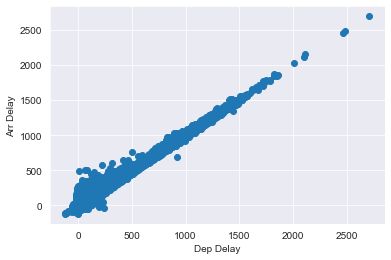

In [8]:
plt.scatter(ml_visual.DEP_DELAY , ml_visual.ARR_DELAY)
plt.xlabel('Dep Delay')
plt.ylabel('Arr Delay')
plt.show()

## Linear relation between Dep Delay and Arr Delay

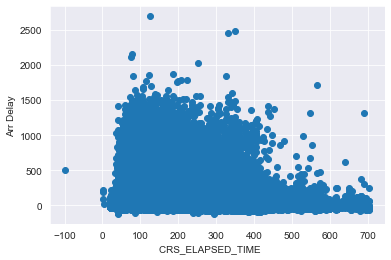

In [9]:
plt.scatter(ml_visual.CRS_ELAPSED_TIME , ml_visual.ARR_DELAY)
plt.xlabel('CRS ELAPSED TIME')
plt.ylabel('Arr Delay')
plt.show()

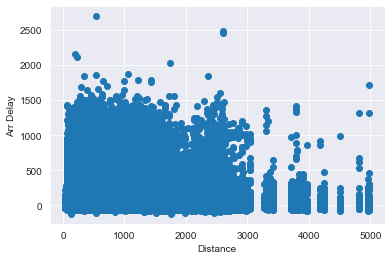

In [10]:
plt.scatter(ml_visual.DISTANCE , ml_visual.ARR_DELAY)
plt.xlabel('Distance')
plt.ylabel('Arr Delay')
plt.show()

## Delays is decresed with long distances

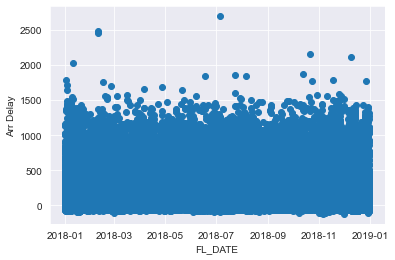

In [11]:
plt.scatter(ml_visual.FL_DATE , ml_visual.ARR_DELAY)
plt.xlabel('FL_DATE')
plt.ylabel('Arr Delay')
plt.show()

## Almost same distribution all over months/days

### Percent for each Carrier over all dataset:

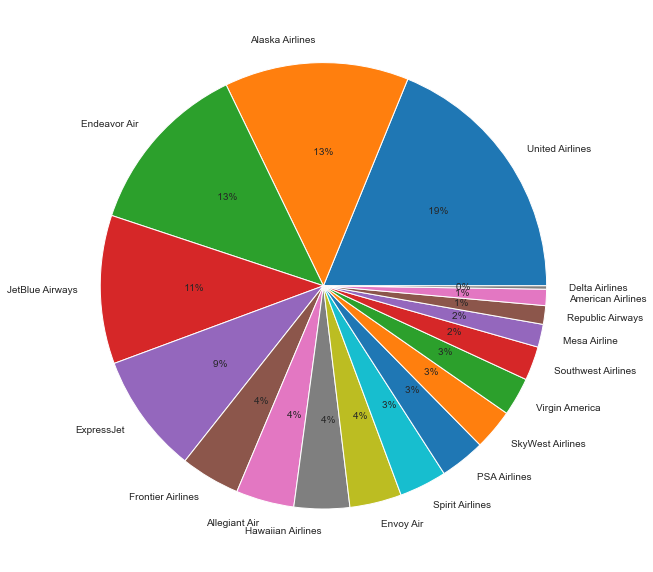

In [13]:
axis = plt.subplots(figsize=(10,14))
Name = ml_visual["OP_CARRIER"].unique()
size = ml_visual["OP_CARRIER"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

In [17]:
### ADD status
status = []
for index in range(count):
    if ml_visual['CANCELLED'][index] == 1.0:
        status.append(2)
    else:
        if ml_visual['ARR_DELAY'][index] <= 0:
            status.append(0)
        else:
            status.append(1)

In [18]:
ml_visual['Status'] = status
ml_visual.Status.value_counts(normalize=True)

## As seen no values for Cancelled flights

0    0.644384
1    0.355616
Name: Status, dtype: float64

In [30]:
def status_data_distribution(data):
    case_count = ml_visual['Status'].value_counts()
    print('Legend:')
    print(case_count)
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=case_count.index, y=case_count.values)
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.title('Data Distribution', fontsize=16)
    plt.xlabel('Flight Status', fontsize=12)
    plt.ylabel('Number of Flights', fontsize=12)
    plt.xticks(range(len(case_count.index)), ['ON TIME(0)', 'DELAYED(1)'])
    plt.show()

Legend:
0    4556965
1    2514852
Name: Status, dtype: int64


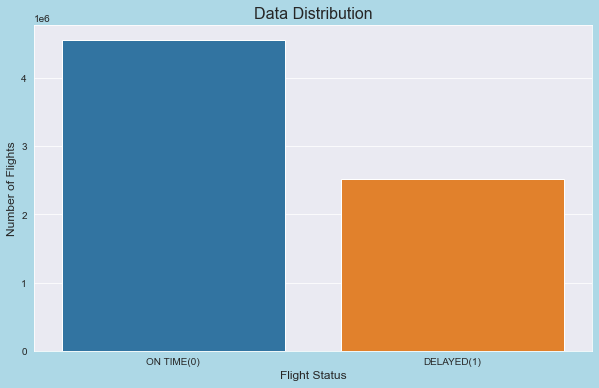

In [31]:
# check On-time / Delay data distribution
status_data_distribution(ml_visual)

In [23]:
ml_visual['flight_name'] = ml_visual['OP_CARRIER'].astype('category')
ml_visual['Month'] = ml_visual['Month'].astype('category')

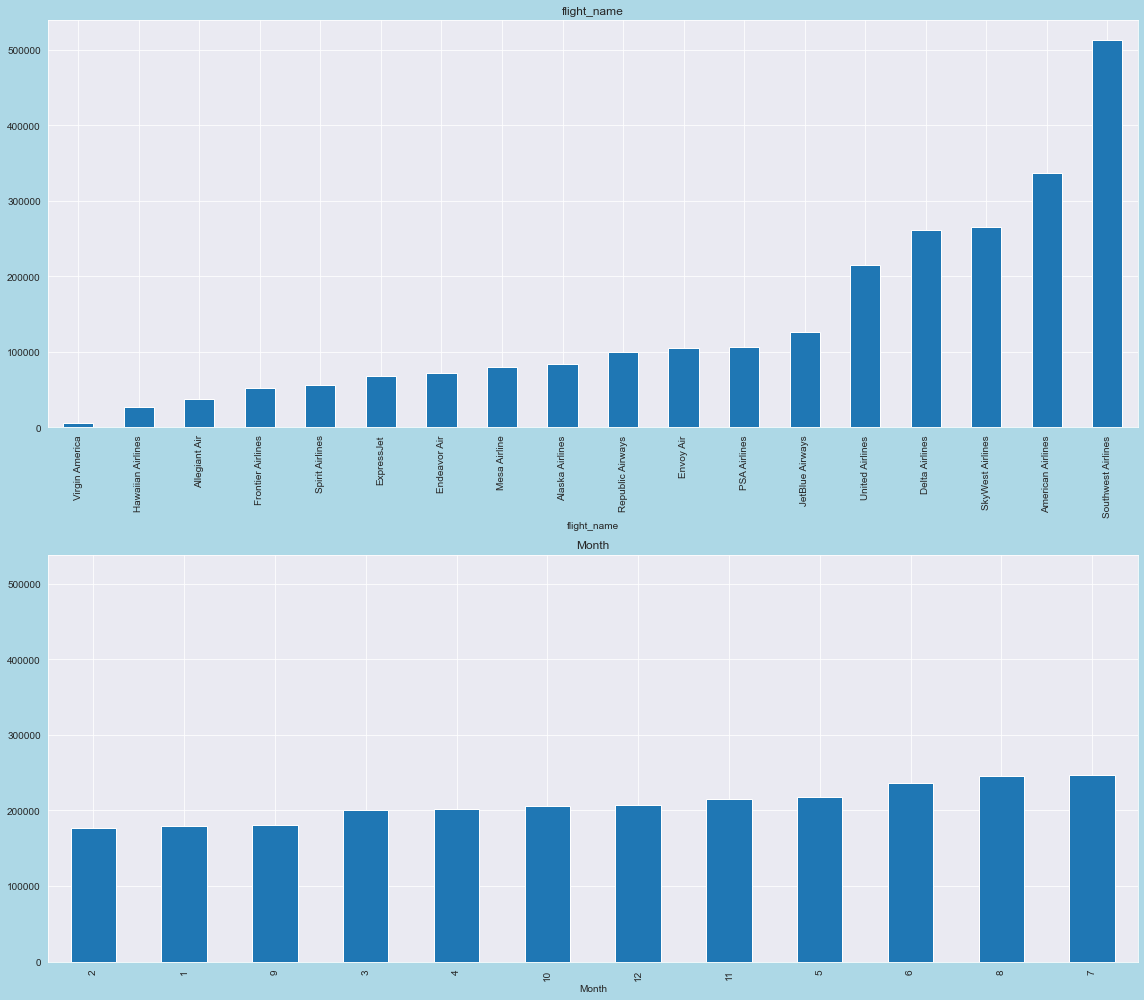

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,14), sharey=True)

categoricals = ['flight_name','Month']

for col, ax in zip(categoricals, axes.flatten()):
    (ml_visual.groupby(col).sum()['Status'].sort_values().plot.bar(ax=ax))
    
    ax.set_title(col)
    
fig.tight_layout()

## Show most Airports having delays (Arrival , Departure , etc)

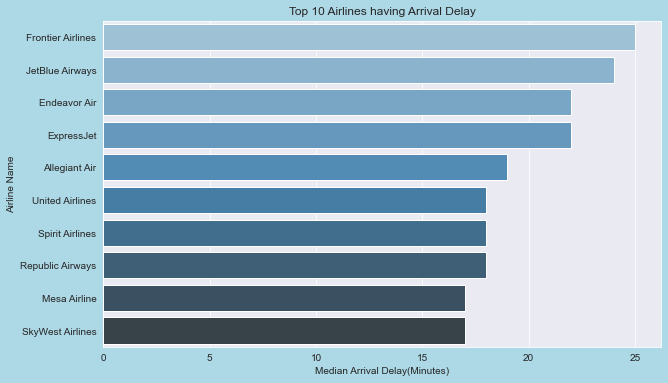

In [25]:
airline_arr = ml_visual[ml_visual['ARR_DELAY']>0]
airline_arr = airline_arr[['flight_name','ARR_DELAY']]
airline_arr = airline_arr.groupby(['flight_name'])['ARR_DELAY'].median().reset_index()
airline_arr = airline_arr.sort_values(by='ARR_DELAY', ascending=False, na_position='first').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='ARR_DELAY', 
            y='flight_name', 
            data=airline_arr, 
            order=airline_arr.sort_values('ARR_DELAY',ascending = False).flight_name,
           palette="Blues_d")
plt.ylabel('Airline Name')
plt.xlabel('Median Arrival Delay(Minutes)')
plt.title('Top 10 Airlines having Arrival Delay')
plt.show()

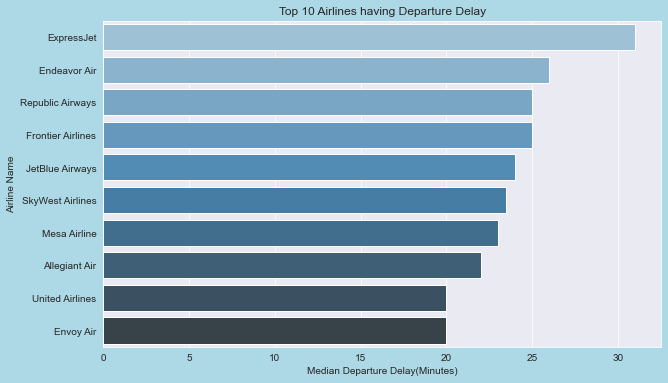

In [26]:
airline_dept = ml_visual[ml_visual['DEP_DELAY']>0]
airline_dept = airline_dept[['flight_name','DEP_DELAY']]
airline_dept = airline_dept.groupby(['flight_name'])['DEP_DELAY'].median().reset_index()
airline_dept = airline_dept.sort_values(by='DEP_DELAY', ascending=False, na_position='first').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='DEP_DELAY', 
            y="flight_name", 
            data=airline_dept, 
            order=airline_dept.sort_values('DEP_DELAY',ascending = False).flight_name,
           palette="Blues_d")
plt.ylabel('Airline Name')
plt.xlabel('Median Departure Delay(Minutes)')
plt.title('Top 10 Airlines having Departure Delay')
plt.show()

In [ ]:
delay_air_port = ml_visual[ml_visual['DEP_DELAY'].notnull()]
delay_air_port = delay_air_port[delay_air_port['Org_Airport'].notnull() ]
delay_air_port = delay_air_port[delay_air_port['Org_Airport'] != " "]
delay_air_port = delay_air_port[['DEP_DELAY','Org_Airport']]
delay_air_port['delay'] = np.where(delay_air_port['DEP_DELAY'] > 0, True, False)
delay_air_port = delay_air_port[delay_air_port['delay']== True]
delay_air_port = delay_air_port['Org_Airport']
delay_air_port.value_counts()[:10].plot.bar(xlabel="Airport Name", ylabel="Count",title = 'Top 10 Airports having more Departure delay')

## 

In [39]:
delta_arr_time =  ml_visual.ARR_TIME - ml_visual.CRS_ARR_TIME 
data = pd.DataFrame()
print(data.shape)


(0, 0)


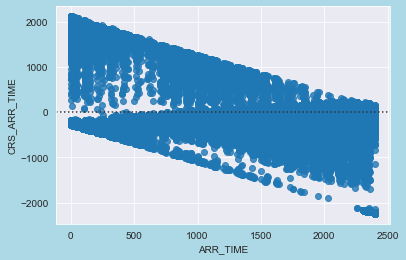

In [40]:
data['ARR_TIME'] = ml_visual.ARR_TIME
data['CRS_ARR_TIME'] = ml_visual.CRS_ARR_TIME
data.shape
sns.residplot(x='ARR_TIME', y='CRS_ARR_TIME', data=data)
  
plt.show()